In [1]:
import pandas as pd


In [3]:
df=pd.read_csv(r"C:\Users\CMKL-Prashant B\Downloads\diabetes_dataset.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


**Feature Selection:** Here, you need to divide given columns into two types of variables dependent(or target variable) and independent variable(or feature variables). Our target variable is Outcome and other variables are feature variables.

In [6]:
X = df.drop(["Outcome"], axis=1)
X

#to get the dataframe of feature variables

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [8]:
y = df.Outcome
y

#to get the target variable Outcome

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

**Splitting Data:** To understand model performance, dividing the dataset into a training set and a test set is a good strategy. I have divided the train and test size in 1:4 ratio (test_size 0.2).

In [11]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [15]:
# Check the shape of the splits
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

# Count of training and test samples
print(f"Training samples: {X_train.shape[0]}")  # Number of rows in X_train
print(f"Testing samples: {X_test.shape[0]}") 

X_train shape: (614, 8)
X_test shape: (154, 8)
y_train shape: (614,)
y_test shape: (154,)
Training samples: 614
Testing samples: 154


**Building Decision Tree Model:** Let’s create a Decision Tree Model using Scikit-learn.

In [20]:
model = DecisionTreeClassifier() #--> create DTC object
model=model.fit(X_train, y_train) #--> train DTC
y_pred = model.predict(X_test) #--> Predict the response for test dataset


**Evaluate Model by 3 types of methods for accuracy calculation** :
1. Normal accuracy : by using sklearn (metrics module)
2. Classification report : by using sklearn (classification_report
3. Confusion matrix : by using sklearn (confusion_matrix)

In [25]:
# Evaluation using Accuracy score
from sklearn import metrics
print("Accuracy: ", metrics.accuracy_score(y_test, y_pred)*100)

metrics.accuracy_score(y_test, y_pred)

Accuracy:  70.12987012987013


0.7012987012987013

### 70.12%

In [27]:
# Evaluation of Confusion matrixs
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[79, 20],
       [26, 29]], dtype=int64)

In [29]:
print("Accuracy: ",((82+27)/154)) 

Accuracy:  0.7077922077922078


In [33]:
# Evaluation using classification report

from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.75      0.80      0.77        99
           1       0.59      0.53      0.56        55

    accuracy                           0.70       154
   macro avg       0.67      0.66      0.67       154
weighted avg       0.70      0.70      0.70       154



In [45]:
#2nd row of dataset : check whether the given inputs predicts right or not
model.predict([[1,85,66,29,0,26.6,0.351,31]])
#The input features are predicting the outcome as 0 i.e. it is giving the right prediction

C:\Users\CMKL-Prashant B\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0], dtype=int64)

In [43]:
#3rd row of dataset
model.predict([[8,183, 64, 0, 0, 23.3, 0.672, 32]])
#The input features are predicting the outcome as 1 i.e. it is giving the right prediction

C:\Users\CMKL-Prashant B\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1], dtype=int64)

We can use or change hyperparameter max_depth=3 and check if accuracy is increses or not
We do hyperparameter tunning with **criterion & max_depth**
lets seeee.....


In [47]:
model = DecisionTreeClassifier(criterion="entropy",max_depth=3)
model = model.fit(X_train, y_train)
y_pred=model.predict(X_test)
print("Accuracy: ", metrics.accuracy_score(y_test, y_pred)*100)

Accuracy:  79.87012987012987


### 79.87% after post hyperparameter tunning

**Why Do We Predict on X_test?**  
* Purpose: X_test contains unseen data that was not used during training. Predicting on this set allows us to evaluate how well the model generalizes to new data.  
* Comparison: Once predictions are made, you compare them to the true labels (y_test) to calculate accuracy or other metrics.  

**What Does model.predict(X_test) Do?**  
* Input: You pass the features from the test set (X_test) to the trained decision tree model.  
* Each row in X_test represents a data point, and the model uses its trained rules (built during the .fit() step) to classify these data points.  
* Output: The predict() method returns the predicted labels (y_pred) for the input features in X_test.  
* y_pred is a 1D array of predictions, where each value corresponds to the model's prediction for a specific data point in X_test.

In [56]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

ModuleNotFoundError: No module named 'sklearn.externals.six'

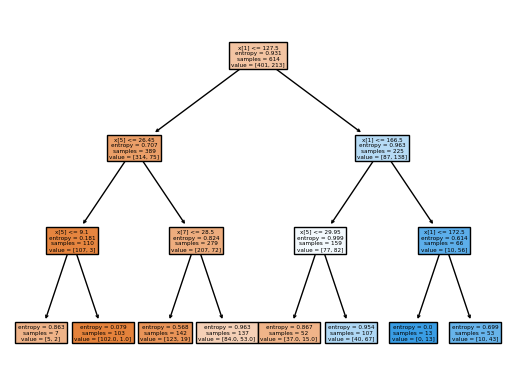

In [58]:
from sklearn import tree
import matplotlib.pyplot as plt

#plt.figure(figsize=(15, 10))                                
tree.plot_tree(model, filled=True)
plt.show()